In [1]:

import pandas as pd
import os
import glob
import email
import time

In [2]:
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
class read_all_files:
    def __init__(self):
        self.res = []
        self.path = []
        # self.count = 0

    def read_emails(self, path):        
        os.chdir(path)  # enter target path, like cd in cmd
        file_lists = os.listdir()  # get all the files and file lists in current directory
        for file in file_lists:  # visit all the files in the list
            if file != '.DS_Store':
              if os.path.isfile(file):  # read file 
                    final_path = os.getcwd()+os.sep+file
                    self.path.append(final_path)
                    with open(final_path,encoding = 'utf8',errors = 'ignore') as f:
                        self.res.append(f.read())
              if os.path.isdir(file):  # if it's a directory, recursively call the function
                  self.read_emails(file)
        # return to the previous path to continue visiting
        os.chdir('..')


In [ ]:
E = read_all_files()

start_time = time.time()
E.read_emails('/content/drive/MyDrive/Capstone/maildir')
end_time = time.time()
end_time - start_time

13296.446683883667

In [ ]:
emails = list(map(email.parser.Parser().parsestr,E.res))

In [ ]:
def get_raw_text(emails):
    email_text = []
    for email in emails.walk():
        if email.get_content_type() == 'text/plain':
            email_text.append(email.get_payload())
    return ''.join(email_text)

In [ ]:
start_time = time.time()
headings  = emails[0].keys()
df = pd.DataFrame()
# Goes through each email and grabs info for each key
# doc['From'] grabs who sent email in all emails
for key in headings:
    df[key] = [doc[key] for doc in emails]

df['body'] = list(map(get_raw_text, emails))
df['file'] = E.path
end_time = time.time()




In [ ]:
end_time - start_time

26.02206039428711

In [ ]:
df.to_csv("/content/drive/MyDrive/Capstone/maildir/table_sample.csv")

In [31]:
df = pd.read_csv("/content/drive/MyDrive/Capstone/table_sample.csv")

In [135]:
print(df.shape)
df.head()

(23719, 24)


,Unnamed: 0,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,X-From,...,X-Origin,X-FileName,body,file,From_new,to_new,clean_body,clean_subject,From_part1,From_part2
0,0,<25480964.1075858304581.JavaMail.evans@thyme>,"Tue, 12 Dec 2000 23:20:00 -0800 (PST)",michael.tribolet@enron.com,"david.gorte@enron.com, james.hachen@enron.com,...",EES Update - Task Force Issues,1.0,text/plain; charset=us-ascii,7bit,Michael Tribolet,...,Buy-R,rbuy.nsf,fyi\n---------------------- Forwarded by Micha...,/Users/skyyce/Documents/2022_Fall/Capstone/mai...,michael.tribolet,enron.com,fyi forwarded michael triboletcorpenron vladim...,ees update task force issues,michael.tribolet,enron.com
1,1,<19069272.1075858304148.JavaMail.evans@thyme>,"Wed, 13 Dec 2000 10:04:00 -0800 (PST)",rosalee.fleming@enron.com,"james.bannantine@enron.com, cliff.baxter@enron...",Thank you for the Charitygift,1.0,text/plain; charset=us-ascii,7bit,Rosalee Fleming,...,Buy-R,rbuy.nsf,---------------------- Forwarded by Rosalee Fl...,/Users/skyyce/Documents/2022_Fall/Capstone/mai...,rosalee.fleming,enron.com,forwarded rosalee flemingcorpenron pm kathy ma...,thank charitygift,rosalee.fleming,enron.com
2,2,<21480737.1075858304322.JavaMail.evans@thyme>,"Wed, 13 Dec 2000 07:38:00 -0800 (PST)",william.bradford@enron.com,rick.buy@enron.com,Re: RAC Holiday Coverage,1.0,text/plain; charset=us-ascii,7bit,William S Bradford,...,Buy-R,rbuy.nsf,I will be in throughout the holiday period but...,/Users/skyyce/Documents/2022_Fall/Capstone/mai...,william.bradford,enron.com,throughout holiday period leaving early team a...,rac holiday coverage,william.bradford,enron.com
3,3,<7735380.1075858304424.JavaMail.evans@thyme>,"Wed, 13 Dec 2000 03:12:00 -0800 (PST)",chip.schneider@enron.com,"rick.buy@enron.com, william.bradford@enron.com",Credit Deterioration in California,1.0,text/plain; charset=us-ascii,7bit,Chip Schneider,...,Buy-R,rbuy.nsf,The attached bulletin from Merrill has some in...,/Users/skyyce/Documents/2022_Fall/Capstone/mai...,chip.schneider,enron.com,attached bulletin merrill ha interesting comme...,credit deterioration california,chip.schneider,enron.com
4,4,<14624068.1075858304348.JavaMail.evans@thyme>,"Wed, 13 Dec 2000 06:59:00 -0800 (PST)",james_r_easter@reliantenergy.com,"mhowe@enron.com, rrice@enron.com, mpeters@enro...",Back in the saddle again...,1.0,text/plain; charset=us-ascii,7bit,James_R_Easter@reliantenergy.com,...,Buy-R,rbuy.nsf,"As some of you have heard, I have gotten back ...",/Users/skyyce/Documents/2022_Fall/Capstone/mai...,james_r_easter,reliantenergy.com,heard gotten back energy business finished wor...,back saddle,james_r_easter,reliantenergy.com


In [ ]:
table = 100*df.isna().sum()/df.shape[0]


pandas.core.series.Series

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk import word_tokenize, sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 
import string
import re
import nltk
import datetime as dt
from PIL import Image
from string import digits

In [ ]:
nltk.download('all')

# Text Data Cleaning

In [58]:
def lemmatize_text(text):
    if str(text)=='nan':
        # print
        return ''
    wordlist=[]
    lemmatizer = WordNetLemmatizer() 
    # print(text)
    sentences=sent_tokenize(text)
    for sentence in sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    return ' '.join(wordlist) 

In [46]:
def remove_Stopwords(text):
    if text=='nan':
        return
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text.lower())
    sentence = [w.replace('\n',"") for w in words if not w in stop_words]
    return " ".join(sentence)

In [47]:
def clean_text(text): 
    if text=='nan':
        return
    delete_dict = {sp_character: '' for sp_character in string.punctuation+digits} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr]) 
    return text2.lower()

In [97]:
df['clean_body'] = df.body
df['clean_body'] = df['clean_body'].apply(lemmatize_text).apply(remove_Stopwords).apply(clean_text)

In [98]:
df['clean_subject'] = df.Subject
df['clean_subject'] = df['clean_subject'].apply(lemmatize_text).apply(remove_Stopwords).apply(clean_text)

In [ ]:
df[['From_part1','From_part2']] = df['From'].str.split('@',expand = True)
df['From_part2'] = df['From_part2'].apply(lambda x:x.replace('>',''))

In [181]:
# count the values for each group
a1 = df[['From_part2','clean_body']].groupby(['From_part2']).count()
a1 = a1.rename(columns = {'clean_body':'count'})
a1.head()

,count
From_part2,
1.americanexpress.com,5
41club.redcarnationhotels.com,7
a1f3-tr1.4at3.net,2
abcny.org,2
abgmail.activeresearch.com,2


In [175]:
df_body = df[['From_part2','clean_body']].groupby('From_part2')['clean_body'].apply(' '.join).reset_index()

In [176]:
df_body = pd.merge(df_body,a1,'inner',left_on = 'From_part2',right_on = 'From_part2').sort_values(['count'],ascending = False)['clean_body']
df_body.head()

116    fyi forwarded michael triboletcorpenron vladim...
356    attached revised draft posting agreement along...
193    isda international swaps derivatives associati...
172    dear tony please advised cargo tank cooled car...
271    notice december nymex members member firms nym...
Name: clean_body, dtype: object

In [177]:
df_subject = df[['From_part2','clean_subject']].groupby('From_part2').clean_subject.apply(' '.join).reset_index()

In [178]:
df_subject = pd.merge(df_subject,a1,'inner',left_on = 'From_part2',right_on = 'From_part2').sort_values(['count'],ascending = False)['clean_subject']
df_subject.head()

116    ees update task force issues thank charitygift...
356    price posting agreement chat enrononline posit...
193    urgent notice today s trading practice committ...
172    lngc hoegh galleon cooldown gas trial lngc hoe...
271    natural gas margin increase inventory taxes al...
Name: clean_subject, dtype: object

# Wordcloud

Group the subjects and bodies by the suffix of the From email

In [62]:
import wordcloud
from wordcloud import WordCloud,ImageColorGenerator,STOPWORDS

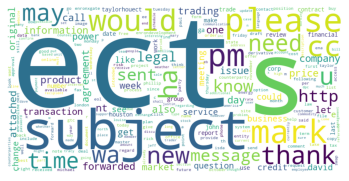

In [193]:
# total body
wc = WordCloud(
    # width=2200, height=2200,
      background_color='white',
          mode='RGB', 
      # mask=backgroud, # create mask for the workcloud
      max_words=500,
      stopwords=set(['email','enroncom','enron']),
      # font_path='C:\Windows\Fonts\STZHONGS.ttf',
      max_font_size=150,
      # relative_scaling=1, =
      random_state=50, 
      scale=2,
      collocations=False 
      ).generate(df_body.sum())
    
  # image_color = ImageColorGenerator(backgroud) # set cloud color
  # wc.recolor(color_func=image_color)

plt.imshow(wc) 
plt.axis('off') 
plt.show()

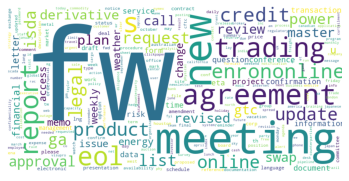

In [194]:
# total subject
wc = WordCloud(
    # width=2200, height=2200,
      background_color='white',
          mode='RGB', 
      # mask=backgroud, # create mask for the workcloud
      max_words=500,
      stopwords=set(['email','enroncom','enron']),
      # font_path='C:\Windows\Fonts\STZHONGS.ttf',
      max_font_size=150,
      # relative_scaling=1, =
      random_state=50, 
      scale=2,
      collocations=False 
      ).generate(df_subject.sum())
  
# image_color = ImageColorGenerator(backgroud) # set cloud color
# wc.recolor(color_func=image_color)

plt.imshow(wc) 
plt.axis('off') 
plt.show()

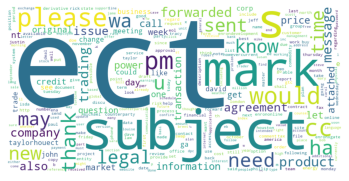

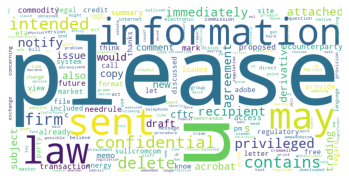

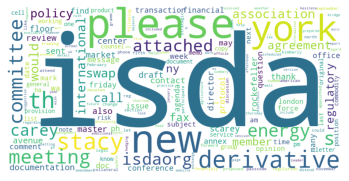

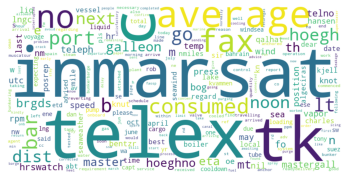

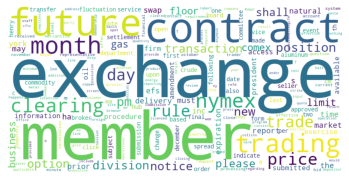

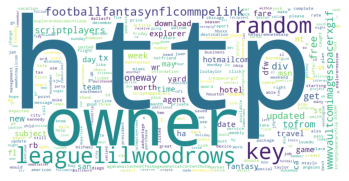

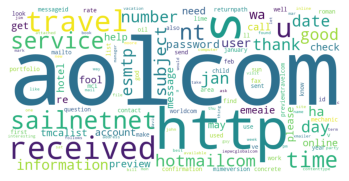

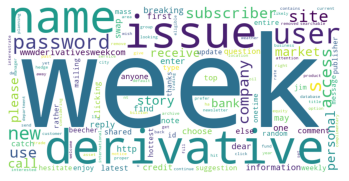

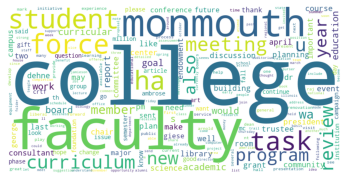

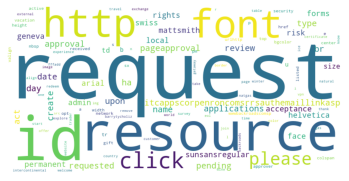

In [185]:
# bodies
for i in range(10):
  wc = WordCloud(
      # width=2200, height=2200,
        background_color='white',
            mode='RGB', 
        # mask=backgroud, # create mask for the workcloud
        max_words=500,
        stopwords=set(['email','enroncom','enron']),
        # font_path='C:\Windows\Fonts\STZHONGS.ttf',
        max_font_size=150,
        # relative_scaling=1, =
        random_state=50, 
        scale=2,
        collocations=False 
        ).generate(df_body.iloc[i])
    
  # image_color = ImageColorGenerator(backgroud) # set cloud color
  # wc.recolor(color_func=image_color)

  plt.imshow(wc) 
  plt.axis('off') 
  plt.show()
# wc.to_file('test1_ciyun.jpg') 

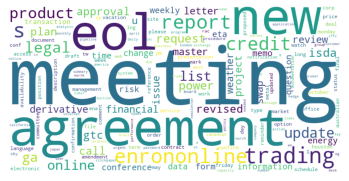

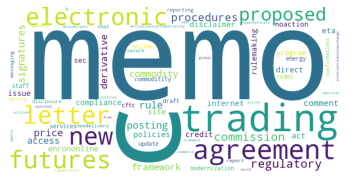

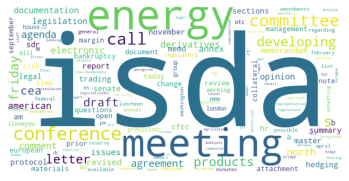

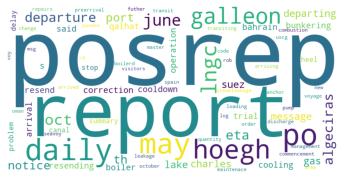

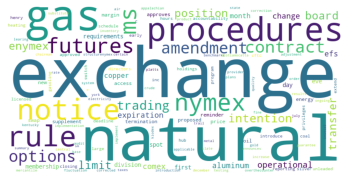

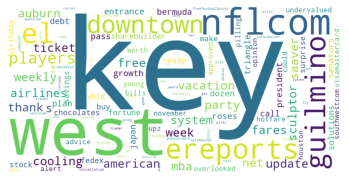

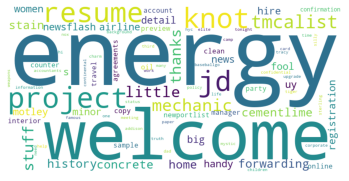

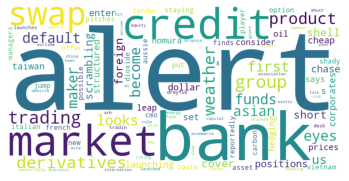

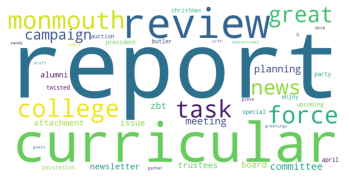

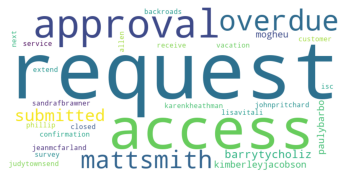

In [187]:
# subject
for i in range(10):
  wc = WordCloud(
      # width=2200, height=2200,
        background_color='white',
            mode='RGB', 
        # mask=backgroud, # create mask for the workcloud
        max_words=500,
        stopwords=set(['email','enroncom','enron']),
        # font_path='C:\Windows\Fonts\STZHONGS.ttf',
        max_font_size=150,
        # relative_scaling=1, =
        random_state=50, 
        scale=2,
        collocations=False 
        ).generate(df_subject.iloc[i])
    
  # image_color = ImageColorGenerator(backgroud) # set cloud color
  # wc.recolor(color_func=image_color)

  plt.imshow(wc) 
  plt.axis('off') 
  plt.show()
# wc.to_file('test1_ciyun.jpg') 